In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from data_provider.data_loader import UEAloader
from types import SimpleNamespace

import pandas as pd
import seaborn as sns
import math

In [2]:
UEA_MTSC30 = ['EthanolConcentration',
              'FaceDetection',
              'Handwriting',
              'Heartbeat',
              'JapaneseVowels',
              'PEMS-SF',
              'SelfRegulationSCP1',
              'SelfRegulationSCP2',
              'SpokenArabicDigits',
              'UWaveGestureLibrary',
              'ArticularyWordRecognition',
              'AtrialFibrillation',
              'BasicMotions',
              'CharacterTrajectories',
              'Cricket',
              'DuckDuckGeese',
              'EigenWorms',
              'Epilepsy',
              'ERing',
              'FingerMovements',
              'HandMovementDirection',
              'InsectWingbeat',
              'Libras',
              'LSST',
              'MotorImagery',
              'NATOPS',
              'PenDigits',
              'PhonemeSpectra',
              'RacketSports',
              'StandWalkJump']

261
263


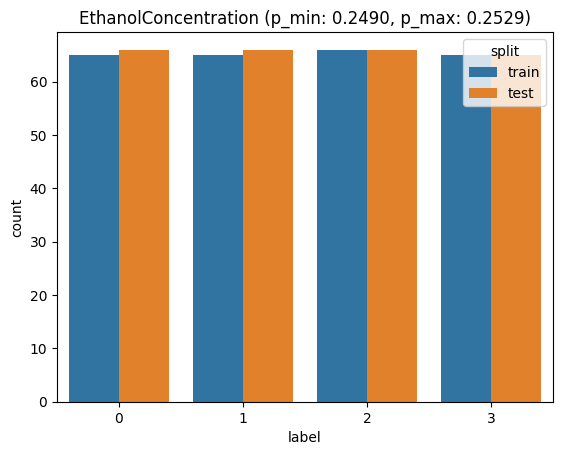

log_2(N_class) : 2.0
-log_2(p_min) : 2.00553818354143
5890
3524


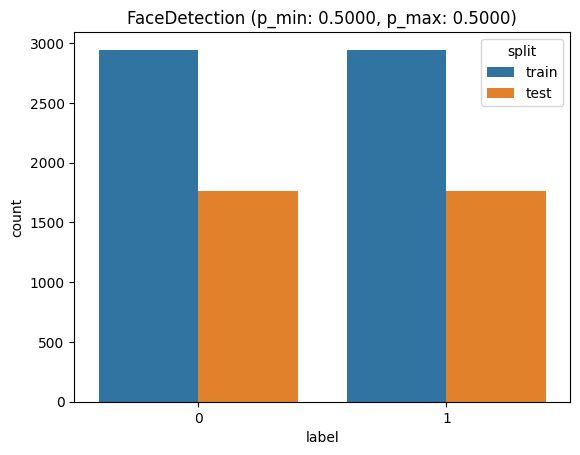

log_2(N_class) : 1.0
-log_2(p_min) : 1.0
150
850


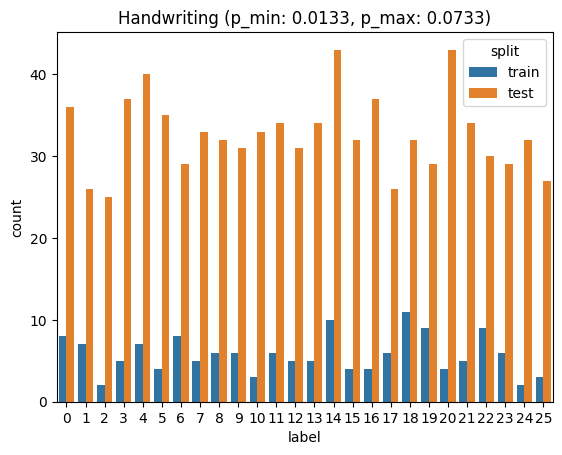

log_2(N_class) : 4.700439718141092
-log_2(p_min) : 6.22881869049588
204
205


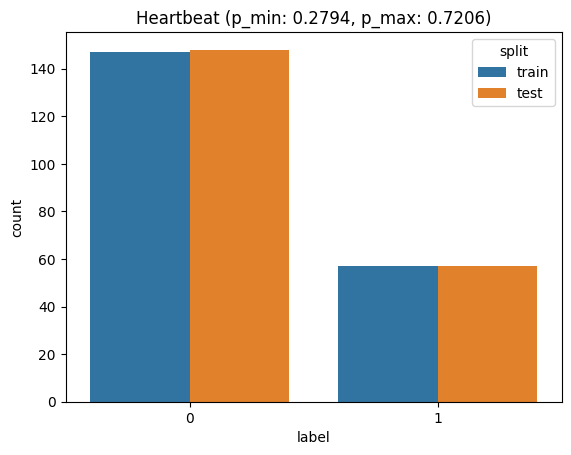

log_2(N_class) : 1.0
-log_2(p_min) : 1.8395353278067539
270
370


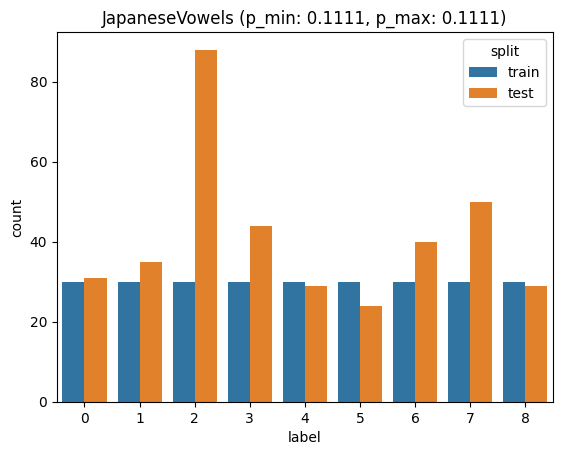

log_2(N_class) : 3.169925001442312
-log_2(p_min) : 3.1699250014423126
267
173


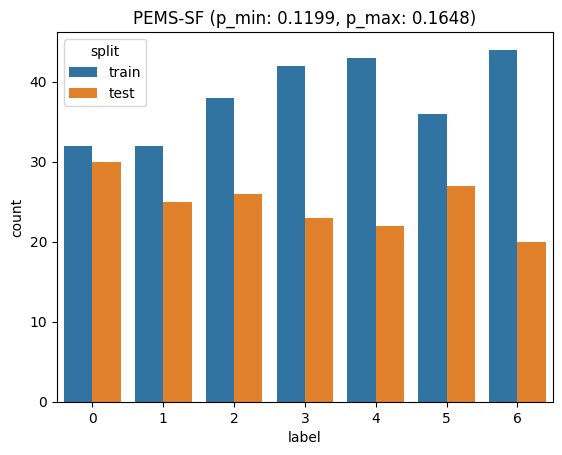

log_2(N_class) : 2.807354922057604
-log_2(p_min) : 3.0606959316875537
268
293


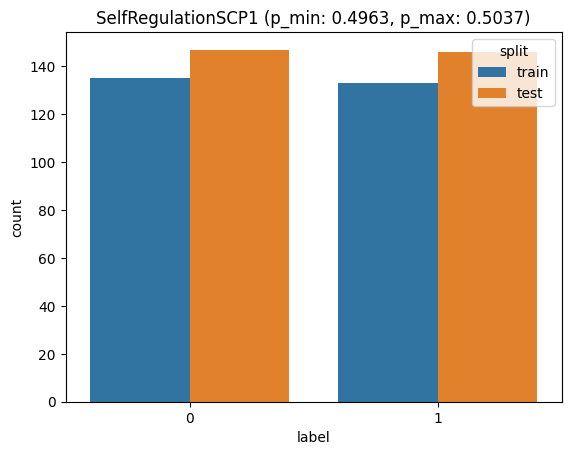

log_2(N_class) : 1.0
-log_2(p_min) : 1.010806754956583
200
180


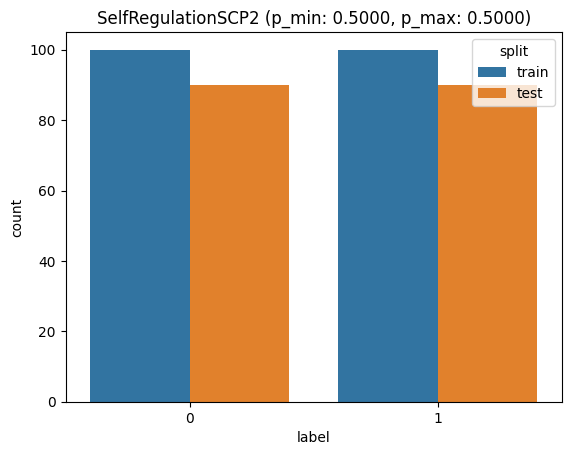

log_2(N_class) : 1.0
-log_2(p_min) : 1.0
6599
2199


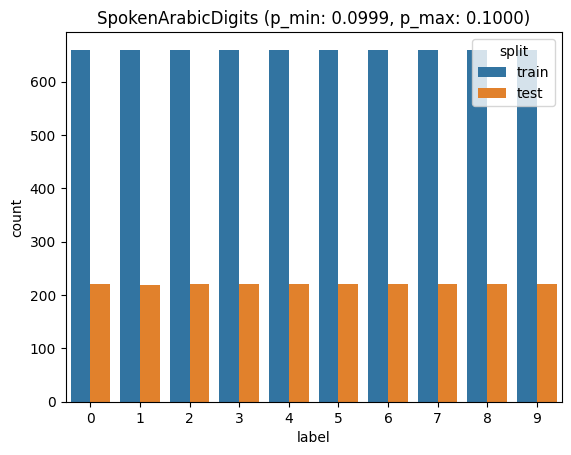

log_2(N_class) : 3.321928094887362
-log_2(p_min) : 3.3238970474058824
120
320


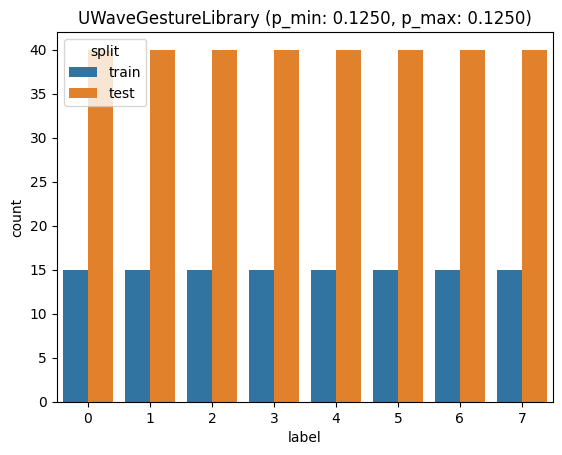

log_2(N_class) : 3.0
-log_2(p_min) : 3.0
275
300


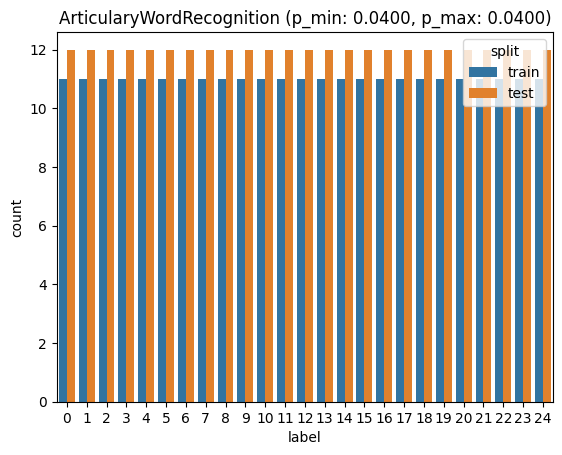

log_2(N_class) : 4.643856189774724
-log_2(p_min) : 4.643856189774724
15
15


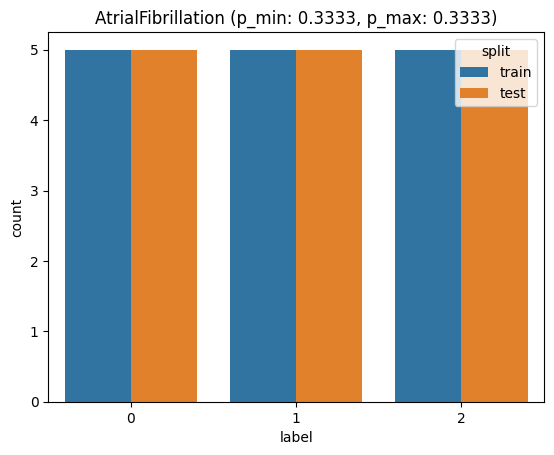

log_2(N_class) : 1.584962500721156
-log_2(p_min) : 1.5849625007211563
40
40


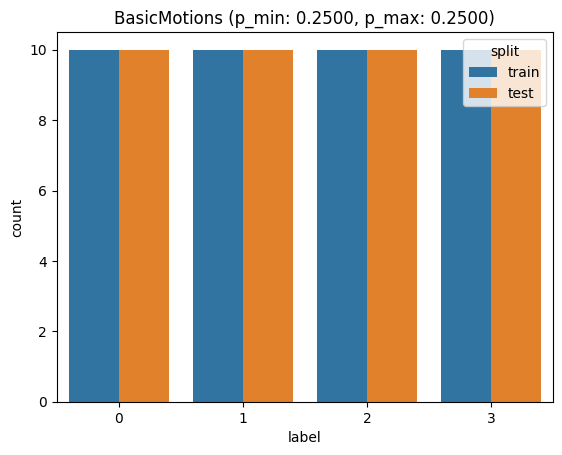

log_2(N_class) : 2.0
-log_2(p_min) : 2.0
1422
1436


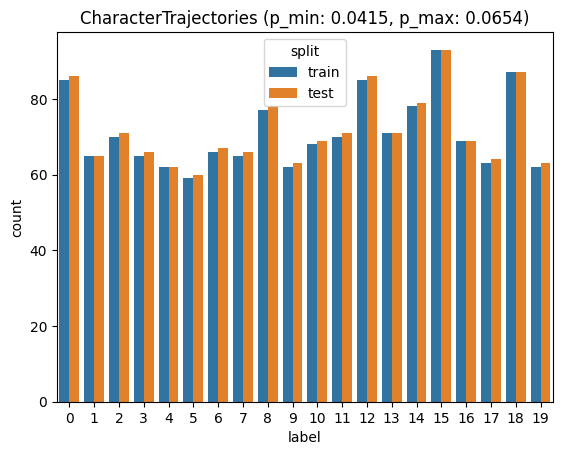

log_2(N_class) : 4.321928094887363
-log_2(p_min) : 4.591062700257574
108
72


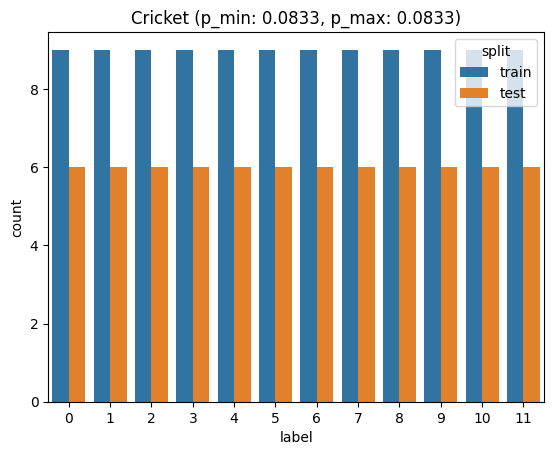

log_2(N_class) : 3.584962500721156
-log_2(p_min) : 3.584962500721156
50
50


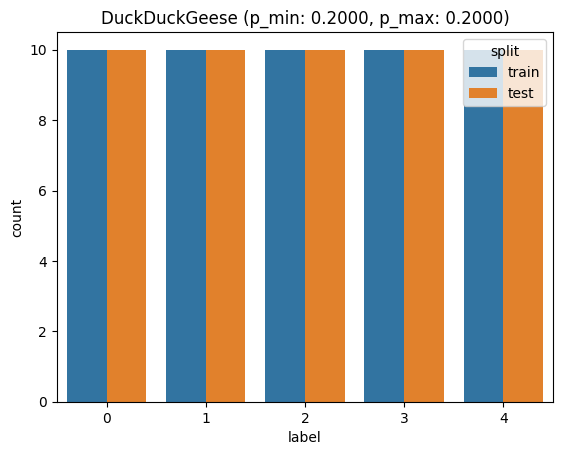

log_2(N_class) : 2.321928094887362
-log_2(p_min) : 2.321928094887362
128
131


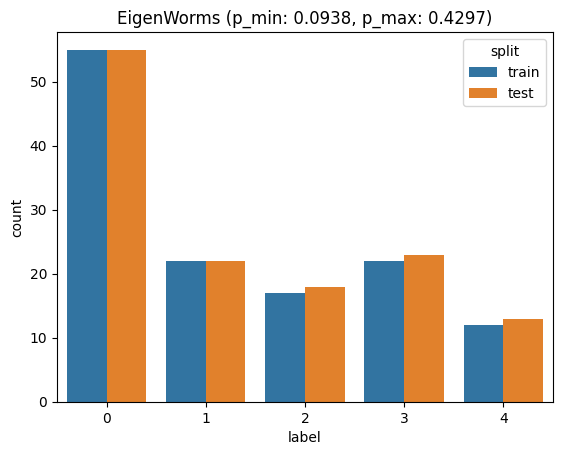

log_2(N_class) : 2.321928094887362
-log_2(p_min) : 3.415037499278844
137
138


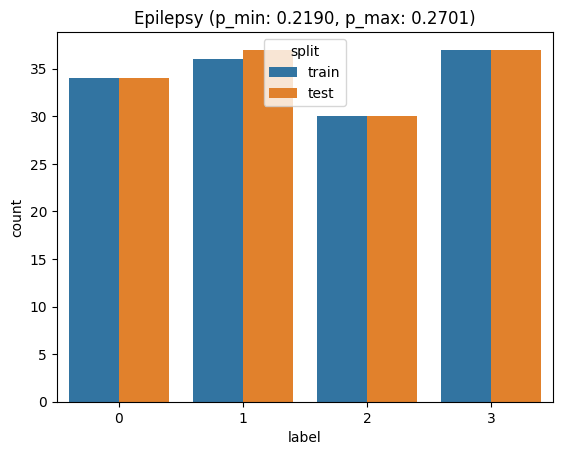

log_2(N_class) : 2.0
-log_2(p_min) : 2.191141487352008
30
270


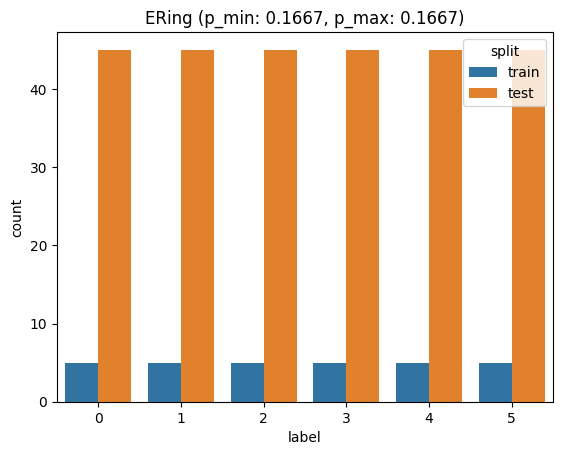

log_2(N_class) : 2.584962500721156
-log_2(p_min) : 2.584962500721156
316
100


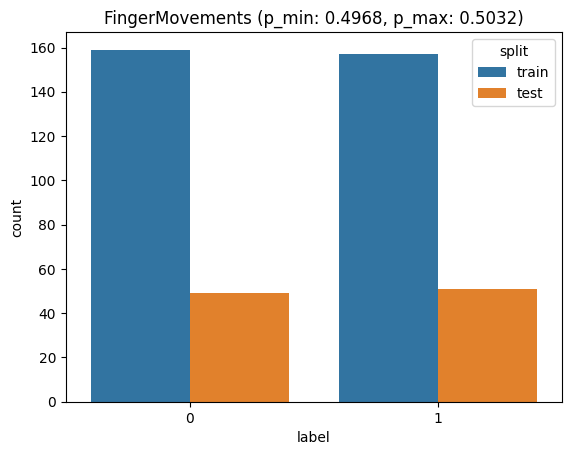

log_2(N_class) : 1.0
-log_2(p_min) : 1.009159999285476
160
74


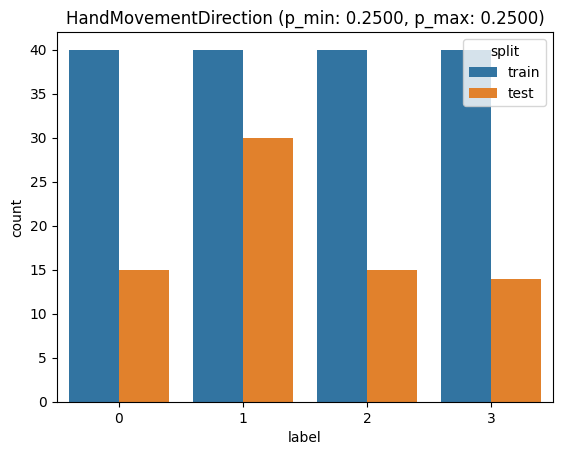

log_2(N_class) : 2.0
-log_2(p_min) : 2.0
25000
25000


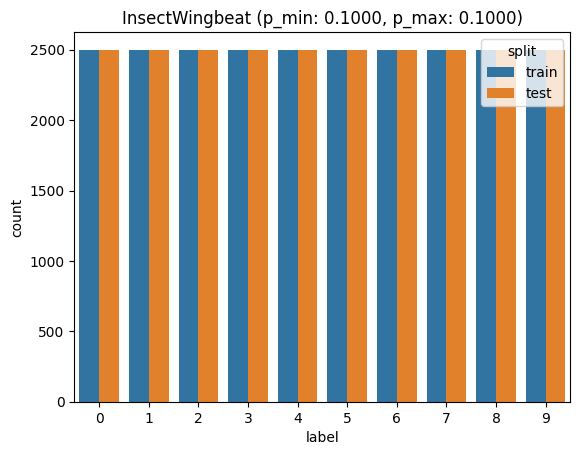

log_2(N_class) : 3.321928094887362
-log_2(p_min) : 3.321928094887362
180
180


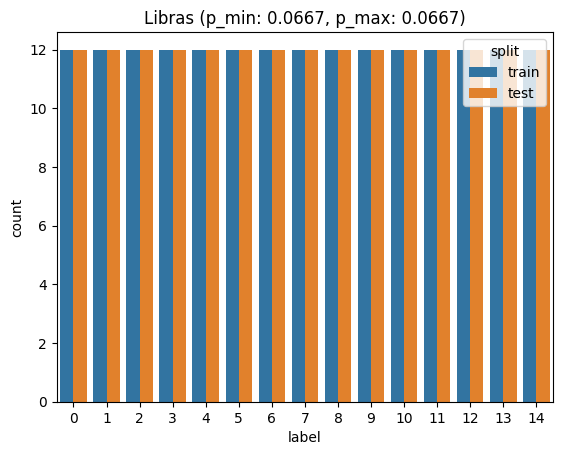

log_2(N_class) : 3.9068905956085187
-log_2(p_min) : 3.9068905956085187
2459
2466


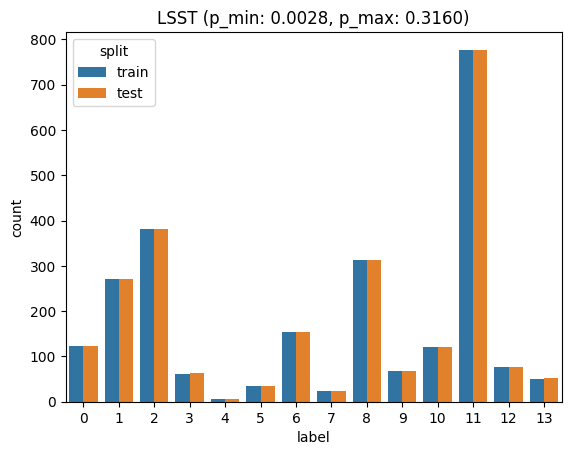

log_2(N_class) : 3.807354922057604
-log_2(p_min) : 8.456501097538478
278
100


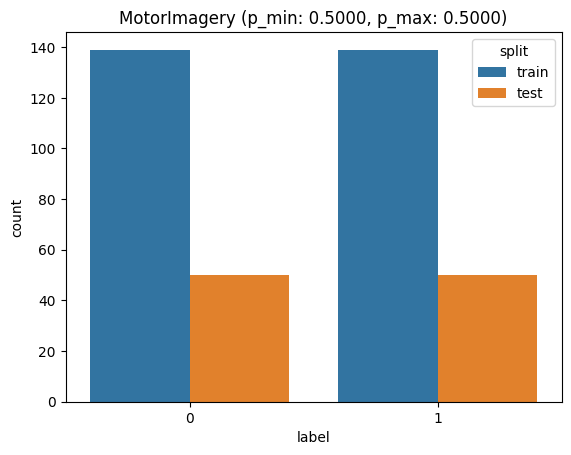

log_2(N_class) : 1.0
-log_2(p_min) : 1.0
180
180


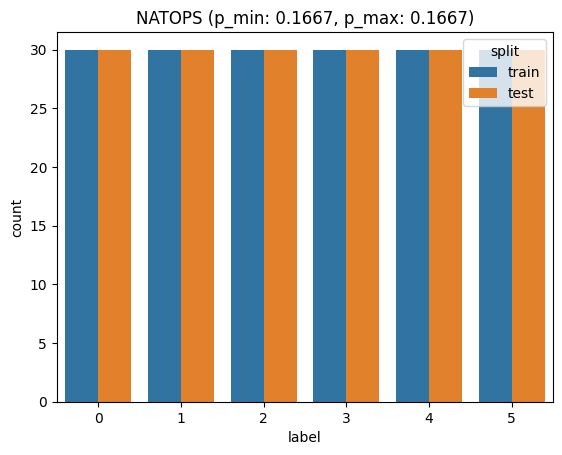

log_2(N_class) : 2.584962500721156
-log_2(p_min) : 2.584962500721156
7494
3498


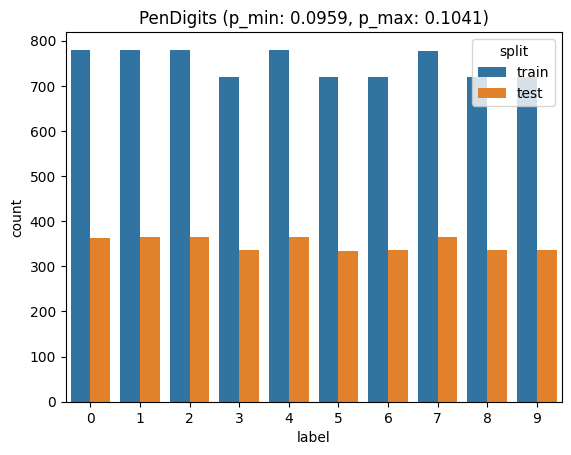

log_2(N_class) : 3.321928094887362
-log_2(p_min) : 3.381672301889816
3315
3353


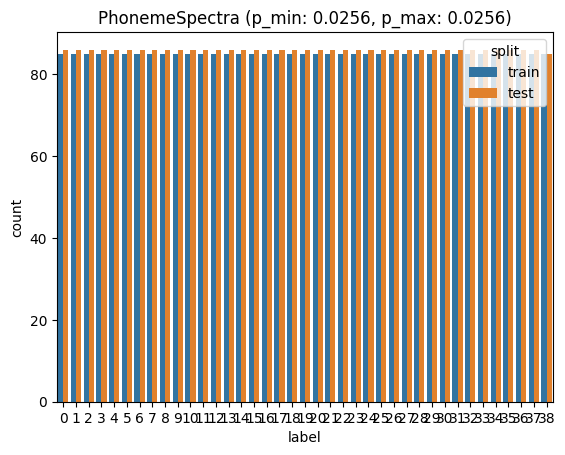

log_2(N_class) : 5.285402218862249
-log_2(p_min) : 5.285402218862249
151
152


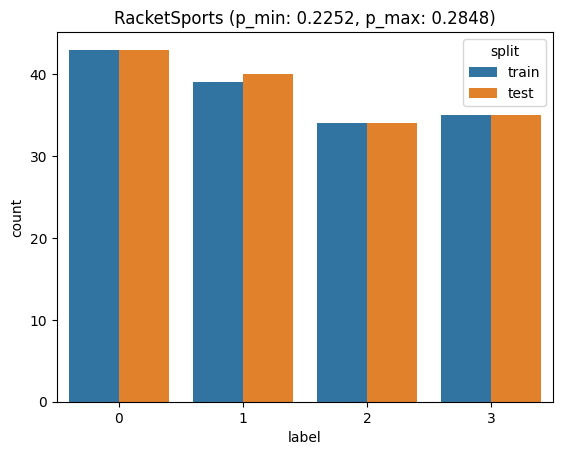

log_2(N_class) : 2.0
-log_2(p_min) : 2.1509418980747395
12
15


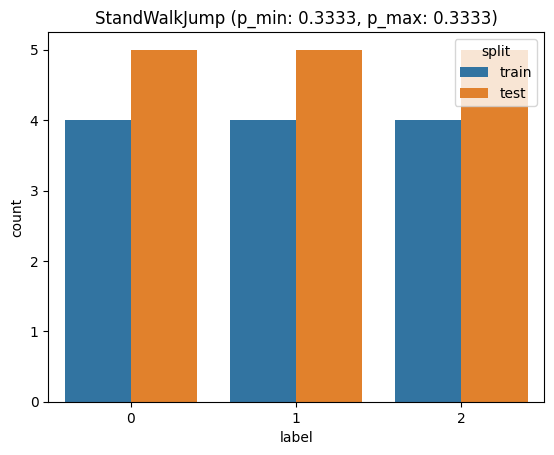

log_2(N_class) : 1.584962500721156
-log_2(p_min) : 1.5849625007211563


<Figure size 640x480 with 0 Axes>

In [3]:
for data_name in UEA_MTSC30:
    args = dict(
        root_path = "/data/username/TSLib/dataset/{}",
    )

    args = SimpleNamespace(**args)

    train_dataset = UEAloader(
        args=args,
        root_path=args.root_path.format(data_name),
        flag="TRAIN",
    )

    test_dataset = UEAloader(
        args=args,
        root_path=args.root_path.format(data_name),
        flag="TEST",
    )

    df = train_dataset.labels_df.copy()
    df.columns = ["label"]
    df["split"] = "train"
    df2 = test_dataset.labels_df.copy()
    df2.columns = ["label"]
    df2["split"] = "test"

    df = pd.concat([df, df2])

    fig = sns.countplot(x="label", hue="split", data=df)
    fig.set_title(f"{data_name} (p_min: {
        train_dataset.labels_df.value_counts().min()/len(train_dataset.labels_df):.4f}, p_max: {
        train_dataset.labels_df.value_counts().max()/len(train_dataset.labels_df):.4f})")
    display(fig.get_figure())
    fig.remove()


    print(f'log_2(N_class) : {math.log2(len(train_dataset.labels_df.value_counts()))}')
    print(f'-log_2(p_min) : {-math.log2(train_dataset.labels_df.value_counts().min()/len(train_dataset.labels_df))}')